## Annals of Dagobah
An Sage-like Analysis of Star Wars Data

1.	Analyze various demographic data
a.	e.g., Pivot tables
b.	What are the most popular characters (top 5)?
2.	What are the most popular characters given demographic subset?
a.	Age
b.	Geographic location
c.	Household income
d.	Education level
3.	What is the variable that correlates most closely with revenue?
a.	Movie database API (eg, OMDB)
4.	Is frequency of tweets (most recent 100) correlated to popularity of characters?
a.	Twitter API


In [1]:
#This is the primary Coding module for the project "The Annals of Dagobah" by the group The Data Swamp Sages of Dagobah.

%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
path_StarWars = "Resources/StarWarsModified.csv"

# Read the City and Ride Data
df_StarWars = pd.read_csv(path_StarWars, encoding='iso8859_2')

# Show dataframe
df_StarWars.head()




,RespondentID,Seen_SW,SW_Fan,SW_Movie1,SW_Movie2,SW_Movie3,SW_Movie4,SW_Movie5,SW_Movie6,SW_Ep1_Rank,...,Y_Prefer,Char_Shot_First,Expand_Univer_Respond,Expand_Univer_Fan,StarTrek_Fan,Gender,Age,Household Income,Education,Location
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### All Fans Population Distribution Analysis (Star Wars only, Star Trek only, and both)

In [2]:
##### Cleaning the dataset so it only has the responses from surveyors that are the following fans:

    ##### Star Wars Fans only
    ##### Star Trek Fans only
    ##### Both Star Wars and Star Trek Fans

# Drop all the rows that are not fans of Star Wars and Star Trek
df_AllFans = df_StarWars[~((df_StarWars['SW_Fan'] == "No") & (df_StarWars['StarTrek_Fan'] == "No"))]

# Drop all rows that have 'NaN' values in the SW_Fan, StarTrek_Fan, and Education columns
df_AllFans = df_AllFans.dropna(subset = ['SW_Fan'] or ['StarTrek_Fan'] or ['Education'])

# Show modifid dataframe
df_AllFans


,RespondentID,Seen_SW,SW_Fan,SW_Movie1,SW_Movie2,SW_Movie3,SW_Movie4,SW_Movie5,SW_Movie6,SW_Ep1_Rank,...,Y_Prefer,Char_Shot_First,Expand_Univer_Respond,Expand_Univer_Fan,StarTrek_Fan,Gender,Age,Household Income,Education,Location
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
13,3292596911,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
14,3292587240,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,No,Male,18-29,NaN,High school degree,East North Central
15,3292583038,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Somewhat favorably,Han,Yes,Yes,Yes,Male,18-29,"$0 - $24,999",Some college or Associate degree,West

### All Fans Population Distribution Histogram Analysis

In [3]:

#'Less than high school degree', 'High school degree', 'Graduate degree', 'Some college or Associate degree', 'Bachelor degree'
# education_counts = df_AllFans["Education"].value_counts()
#print(education_counts)

#education_count = df_AllFans.groupby(["Education"])
#education_count.count()

# Create
df_AllFans['Education2'] = df_AllFans['Education']

df_AllFans = df_AllFans.copy()

df_AllFans.replace({'Education2': {'Less than high school degree': 1, 'High school degree': 2, 
                                   'Some college or Associate degree': 3, 'Bachelor degree': 4, 'Graduate degree': 5}}, 
                                   inplace =True)

df_AllFans



,RespondentID,Seen_SW,SW_Fan,SW_Movie1,SW_Movie2,SW_Movie3,SW_Movie4,SW_Movie5,SW_Movie6,SW_Ep1_Rank,...,Char_Shot_First,Expand_Univer_Respond,Expand_Univer_Fan,StarTrek_Fan,Gender,Age,Household Income,Education,Location,Education2
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic,2.0
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,3.0
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,3.0
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,4.0
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central,2.0
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic,2.0
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic,3.0
13,3292596911,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,I don't understand this question,No,NaN,No,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain,5.0
14,3292587240,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Han,No,NaN,No,Male,18-29,NaN,High school degree,East North Central,2.0
15,3292583038,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Han,Yes,Yes,Yes,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B466885F98>]],
      dtype=object)

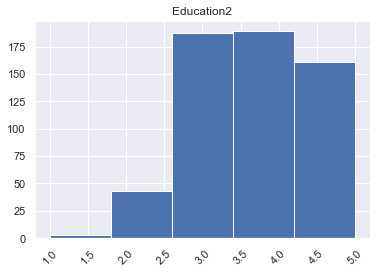

In [24]:
df_AllFans.hist('Education2', xrot = 45, bins = 5)


#x = df_AllFans['Education2'].values
#x= x.copy()
#plt.hist(x, range = (x.min(),x.max()), bins = 5)
#plt.show()

#AllFans_edu_grpd = df_AllFans.groupby('Education2')['RespondentID'].unique()
#df_AllFans_edu_grpd = pd.DataFrame(AllFans_edu_grpd)

#bin_labels = ['Less than high school degree', 'Some college or Associate degree', 'High school degree', 
              #'Bachelor degree','Graduate degree']


#ax = plt.subplot(1,1,1)
#width=0.3
#bins= map(lambda x: x-width/2, range(1,6)) 
#ax.bar(bins,df_AllFans_edu_grpd,width=width)
#ax.set_xticks(map(lambda x:x, range(1,6)))
#ax.set_xticklabels(bin_labels,rotation=45)



In [ ]:
# Drop all the rows that are not fans of Star Wars
df_StarWarsFans = df_StarWars[df_StarWars.SW_Fan != "No"]

# Drop all rows that have NaN values in SW_Fan columns
df_StarWarsFans = df_StarWarsFans.dropna(subset = ['SW_Fan'])

# Show modifid dataframe
df_StarWarsFans.head()


### Data Munging - Star Trek Fans

In [ ]:
# Drop all rows that are not fans of Star Trek
df_StarTrekFans = df_StarWars[df_StarWars.StarTrek_Fan != "No"]    

# Drop all rows that have NaN values in SW_Fan or StarTrek_Fan columns
df_StarTrekFans = df_StarTrekFans.dropna(subset =['StarTrek_Fan'])

# Show modifid dataframe
df_StarTrekFans.head()

In [ ]:
# Count the number of unique items to every element of the series that appears only once in the 'RespondentID' column
Total_Respondents_Count = len(df_StarWars["RespondentID"].unique())

#Convert calculatd data into a dataframe
Total_Respondents_Summary = pd.DataFrame({"Total Respondents": [Total_Respondents_Count]})

# Display the summary dataframe
Total_Respondents_Summary

In [ ]:
# Count the number of Star Wars fans to every element of the series that appears only once in the 'RespondentID' column
Total_SWFans_Count = len(df_StarWarsFans["SW_Fan"])

# Count the number of Star Trek fans to every element of the series that appears only once in the 'RespondentID' column
Total_STFans_Count = len(df_StarTrekFans["StarTrek_Fan"])

# Calculate the total number of Star Wars and Star Trek fans combined
Grand_Fan_Total = Total_SWFans_Count + Total_STFans_Count

#Convert calculatd data into a dataframe
Total_CombinedFans_Summary = pd.DataFrame({"Total Star Wars Fans": [Total_SWFans_Count],
                                          "Total Star Trek Fans": [Total_STFans_Count],
                                         "Grand Total of Fans": [Grand_Fan_Total]})

# Display the summary dataframe
Total_CombinedFans_Summary


### Gender Demographics Analysis

##### Hypothesis: Females are more likely to be fans of Star Trek than Star Wars franchise. On the other hand, Males are more likely to be fans of Star Wars than Star Trek franchise.

##### Null Hypothesis: There is no significance with the gender and their being a fan of either franchise.

In [ ]:
# Calculate the total of each unique gender in the series under the 'Gender' column
gender_counts = df_StarWars["Gender"].value_counts()

# Calculate the total of each unique gender in the series under the 'Gender' and 'SW_Fan' columns
SWGender_counts = df_StarWarsFans.groupby(["Gender"]).count()["SW_Fan"].rename("Star Wars Fan")

# Calculate the total of each unique gender in the series under the 'Gender' and 'StarTrek_Fan' columns
STGender_counts = df_StarTrekFans.groupby(["Gender"]).count()["StarTrek_Fan"].rename("Star Trek Fan")


# Calculate the total percentage of each gender items from the total respondents count
gender_percentage = gender_counts / Total_Respondents_Count * 100

# Calculate the total percentage of each gender item that are Star Wars Fans from the total respondents count
SWGender_percentage = SWGender_counts /  Total_Respondents_Count * 100

# Calculate the total percentage of each gender item that are Star Trek Fans from the total respondents count
STGender_percentage = STGender_counts /  Total_Respondents_Count * 100


# Convert data into a dataframe
gender_demo_analysis = pd.DataFrame({
    
    "Total Percentage of Fans": gender_percentage,
    "Percentage of Star Wars Fans": SWGender_percentage,
    "Percentage of Star Trek Fans": STGender_percentage,
    "Total Fan Count": gender_counts,
})

# Convert the values of the three percentage of fans columns into 2 places decimal format
gender_demo_analysis["Total Percentage of Fans"]= gender_demo_analysis["Total Percentage of Fans"].map("{:,.2f}%".format)
gender_demo_analysis["Percentage of Star Wars Fans"]= gender_demo_analysis["Percentage of Star Wars Fans"].map("{:,.2f}%".format)
gender_demo_analysis["Percentage of Star Trek Fans"]= gender_demo_analysis["Percentage of Star Trek Fans"].map("{:,.2f}%".format)

# Display the summary dataframe data
gender_demo_analysis

## Gender Demographics Pie Chart Analysis

In [ ]:
# Labels for the sections of the pie chart
gender_labels = ["Female","Male"]

# Create the Pie Chart
gender_colors = ["lightcoral","lightskyblue"]
gender_explode = (0, 0)

plt.title("Percentage of Total Star Wars Fans By Gender")
plt.pie(SWGender_counts, explode=gender_explode, labels=gender_labels, colors=gender_colors, autopct="%1.1f%%",shadow=True, startangle=130)
plt.axis("equal")

# Save Figure
plt.savefig("Images/Percentage of Total Star Wars Fans By Gender.png")
plt.show()

In [ ]:
# Labels for the sections of the pie chart
STgender_labels = ["Female","Male"]

# Create the Pie Chart
STgender_colors = ["lightcoral","lightskyblue"]
STgender_explode = (0, 0)

plt.title("Percentage of Total Star Trek Fans By Gender")
plt.pie(STGender_counts, explode=STgender_explode, labels=STgender_labels, colors=STgender_colors, autopct="%1.1f%%",shadow=True, startangle=130)
plt.axis("equal")

# Save Figure
plt.savefig("Images/Percentage of Total Star Trek Fans By Gender.png")
plt.show()

## Education Demographics

## Household Income Demographics

## Age Demographics

In [ ]:
# Calculate the total of each unique age in the series under the 'Age' column
age_counts = df_StarWars["Age"].value_counts()

# Calculate the total of each unique age in the series under the 'Age' and 'SW_Fan' columns
SWAge_counts = df_StarWarsFans.groupby(["Age"]).count()["SW_Fan"].rename("Star Wars Fan")

# Calculate the total of each unique age in the series under the 'Age' and 'StarTrek_Fan' columns
STAge_counts = df_StarTrekFans.groupby(["Age"]).count()["StarTrek_Fan"].rename("Star Trek Fan")


# Calculate the total percentage of each age items from the total respondents count
age_percentage = age_counts / Total_Respondents_Count * 100

# Calculate the total percentage of each age item that are Star Wars Fans from the total respondents count
SWAge_percentage = SWAge_counts /  Total_Respondents_Count * 100

# Calculate the total percentage of each age item that are Star Trek Fans from the total respondents count
STAge_percentage = STAge_counts /  Total_Respondents_Count * 100


# Convert data into a dataframe
age_demo_analysis = pd.DataFrame({
    
    "Total Percentage of Fans": age_percentage,
    "Percentage of Star Wars Fans": SWAge_percentage,
    "Percentage of Star Trek Fans": STAge_percentage,
    "Total Fan Count": age_counts,
})

# Convert the values of the three percentage of fans columns into 2 places decimal format
age_demo_analysis["Total Percentage of Fans"]= gender_demo_analysis["Total Percentage of Fans"].map("{:,.2f}%".format)
age_demo_analysis["Percentage of Star Wars Fans"]= gender_demo_analysis["Percentage of Star Wars Fans"].map("{:,.2f}%".format)
age_demo_analysis["Percentage of Star Trek Fans"]= gender_demo_analysis["Percentage of Star Trek Fans"].map("{:,.2f}%".format)

# Display the summary dataframe data
gender_demo_analysis

## Location Demographics